In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import keras

import pandas as pd
from keras import layers,models
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dane=pd.read_csv("/content/drive/MyDrive/Dane_2/Tabela1_twarz_generator.csv")
dane.head()

,l1_f,l2_f,l3_f,4_f,l5_f,l6_f,l7_f,l8_f,l9_f,l10_f,o
0,5,2,3,1,3,1,1,1,1,3,0
1,5,5,4,5,3,1,2,5,3,5,0
2,3,4,4,0,1,5,2,5,5,4,0
3,1,3,3,3,4,0,4,4,6,6,0
4,2,1,5,2,3,5,5,2,3,3,0


In [3]:
dane=dane.sample(frac=1)

In [4]:
X=dane.iloc[:,:10]
X.head()

,l1_f,l2_f,l3_f,4_f,l5_f,l6_f,l7_f,l8_f,l9_f,l10_f
2391,3,6,6,6,6,6,3,6,3,6
122,6,1,3,1,5,3,5,6,0,3
928,3,6,4,4,5,2,0,0,2,4
101,4,1,6,6,3,3,2,3,3,3
920,3,5,3,2,4,0,1,4,1,4


In [5]:
Y=dane.iloc[:,10:]
Y.head()

,o
2391,1
122,0
928,0
101,0
920,0


In [6]:
X.to_numpy()
Y.to_numpy()

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [7]:
print(len(X))
print(X)

2600
      l1_f  l2_f  l3_f  4_f  l5_f  l6_f  l7_f  l8_f  l9_f  l10_f
2391     3     6     6    6     6     6     3     6     3      6
122      6     1     3    1     5     3     5     6     0      3
928      3     6     4    4     5     2     0     0     2      4
101      4     1     6    6     3     3     2     3     3      3
920      3     5     3    2     4     0     1     4     1      4
...    ...   ...   ...  ...   ...   ...   ...   ...   ...    ...
1349     6     6     3    3     6     3     6     6     6      6
975      2     5     1    4     2     6     3     2     6      3
1219     1     1     3    4     2     2     4     3     2      2
774      1     5     0    0     3     5     1     4     2      5
922      0     5     3    4     6     6     4     4     2      4

[2600 rows x 10 columns]


In [8]:

X_train=[]
Y_train=[]
X_validate=[]
Y_validate=[]
X_test=[]
Y_test=[]

In [9]:
X_all=X
Y_all=Y

In [10]:
Y_all.shape
X_all.shape

(2600, 10)

In [11]:

Y_all=keras.utils.to_categorical(Y_all,2)


In [12]:
X_validate=X_all[(len(X_all)-60):len(X_all)]
Y_validate=Y_all[(len(Y_all)-60):len(Y_all)]

X_train=X_all[0:(len(X_all)-60)]
Y_train=Y_all[0:(len(Y_all)-60)]
print(len(Y_train))

2540


In [13]:
X_train.shape



(2540, 10)

In [14]:
model=keras.Sequential()
model.add(layers.Dense(4,activation='relu',input_shape=(10,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(8,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(8,activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(2,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 44        
                                                                 
 batch_normalization (Batch  (None, 4)                 16        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 batch_normalization_1 (Bat  (None, 8)                 32        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 batch_normalization_2 (Bat  (None, 8)                 3

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(X_train,Y_train,batch_size=16,epochs=10,validation_data=(X_validate,Y_validate),verbose=1)

Epoch 1/10
159/159 [==============================] - 5s 6ms/step - loss: 0.6987 - accuracy: 0.5634 - val_loss: 0.5407 - val_accuracy: 0.7500
Epoch 2/10
159/159 [==============================] - 1s 5ms/step - loss: 0.4808 - accuracy: 0.7854 - val_loss: 0.3728 - val_accuracy: 0.8333
Epoch 3/10
159/159 [==============================] - 1s 5ms/step - loss: 0.3235 - accuracy: 0.8650 - val_loss: 0.1985 - val_accuracy: 0.9333
Epoch 4/10
159/159 [==============================] - 1s 5ms/step - loss: 0.2235 - accuracy: 0.9165 - val_loss: 0.1103 - val_accuracy: 0.9667
Epoch 5/10
159/159 [==============================] - 1s 5ms/step - loss: 0.1702 - accuracy: 0.9402 - val_loss: 0.0475 - val_accuracy: 0.9667
Epoch 6/10
159/159 [==============================] - 1s 5ms/step - loss: 0.1361 - accuracy: 0.9488 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 7/10
159/159 [==============================] - 1s 5ms/step - loss: 0.1063 - accuracy: 0.9642 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 

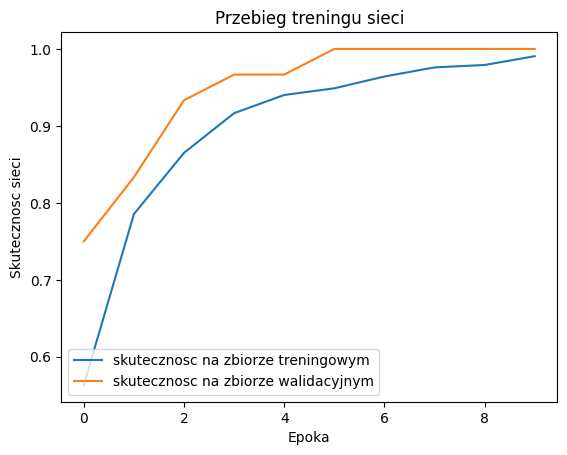

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Przebieg treningu sieci')
plt.ylabel('Skutecznosc sieci')
plt.xlabel('Epoka')
plt.legend(['skutecznosc na zbiorze treningowym', 'skutecznosc na zbiorze walidacyjnym'], loc='lower left')
plt.show()
#model.save('/content/drive/MyDrive/Colab Notebooks/model_twarze.h5')